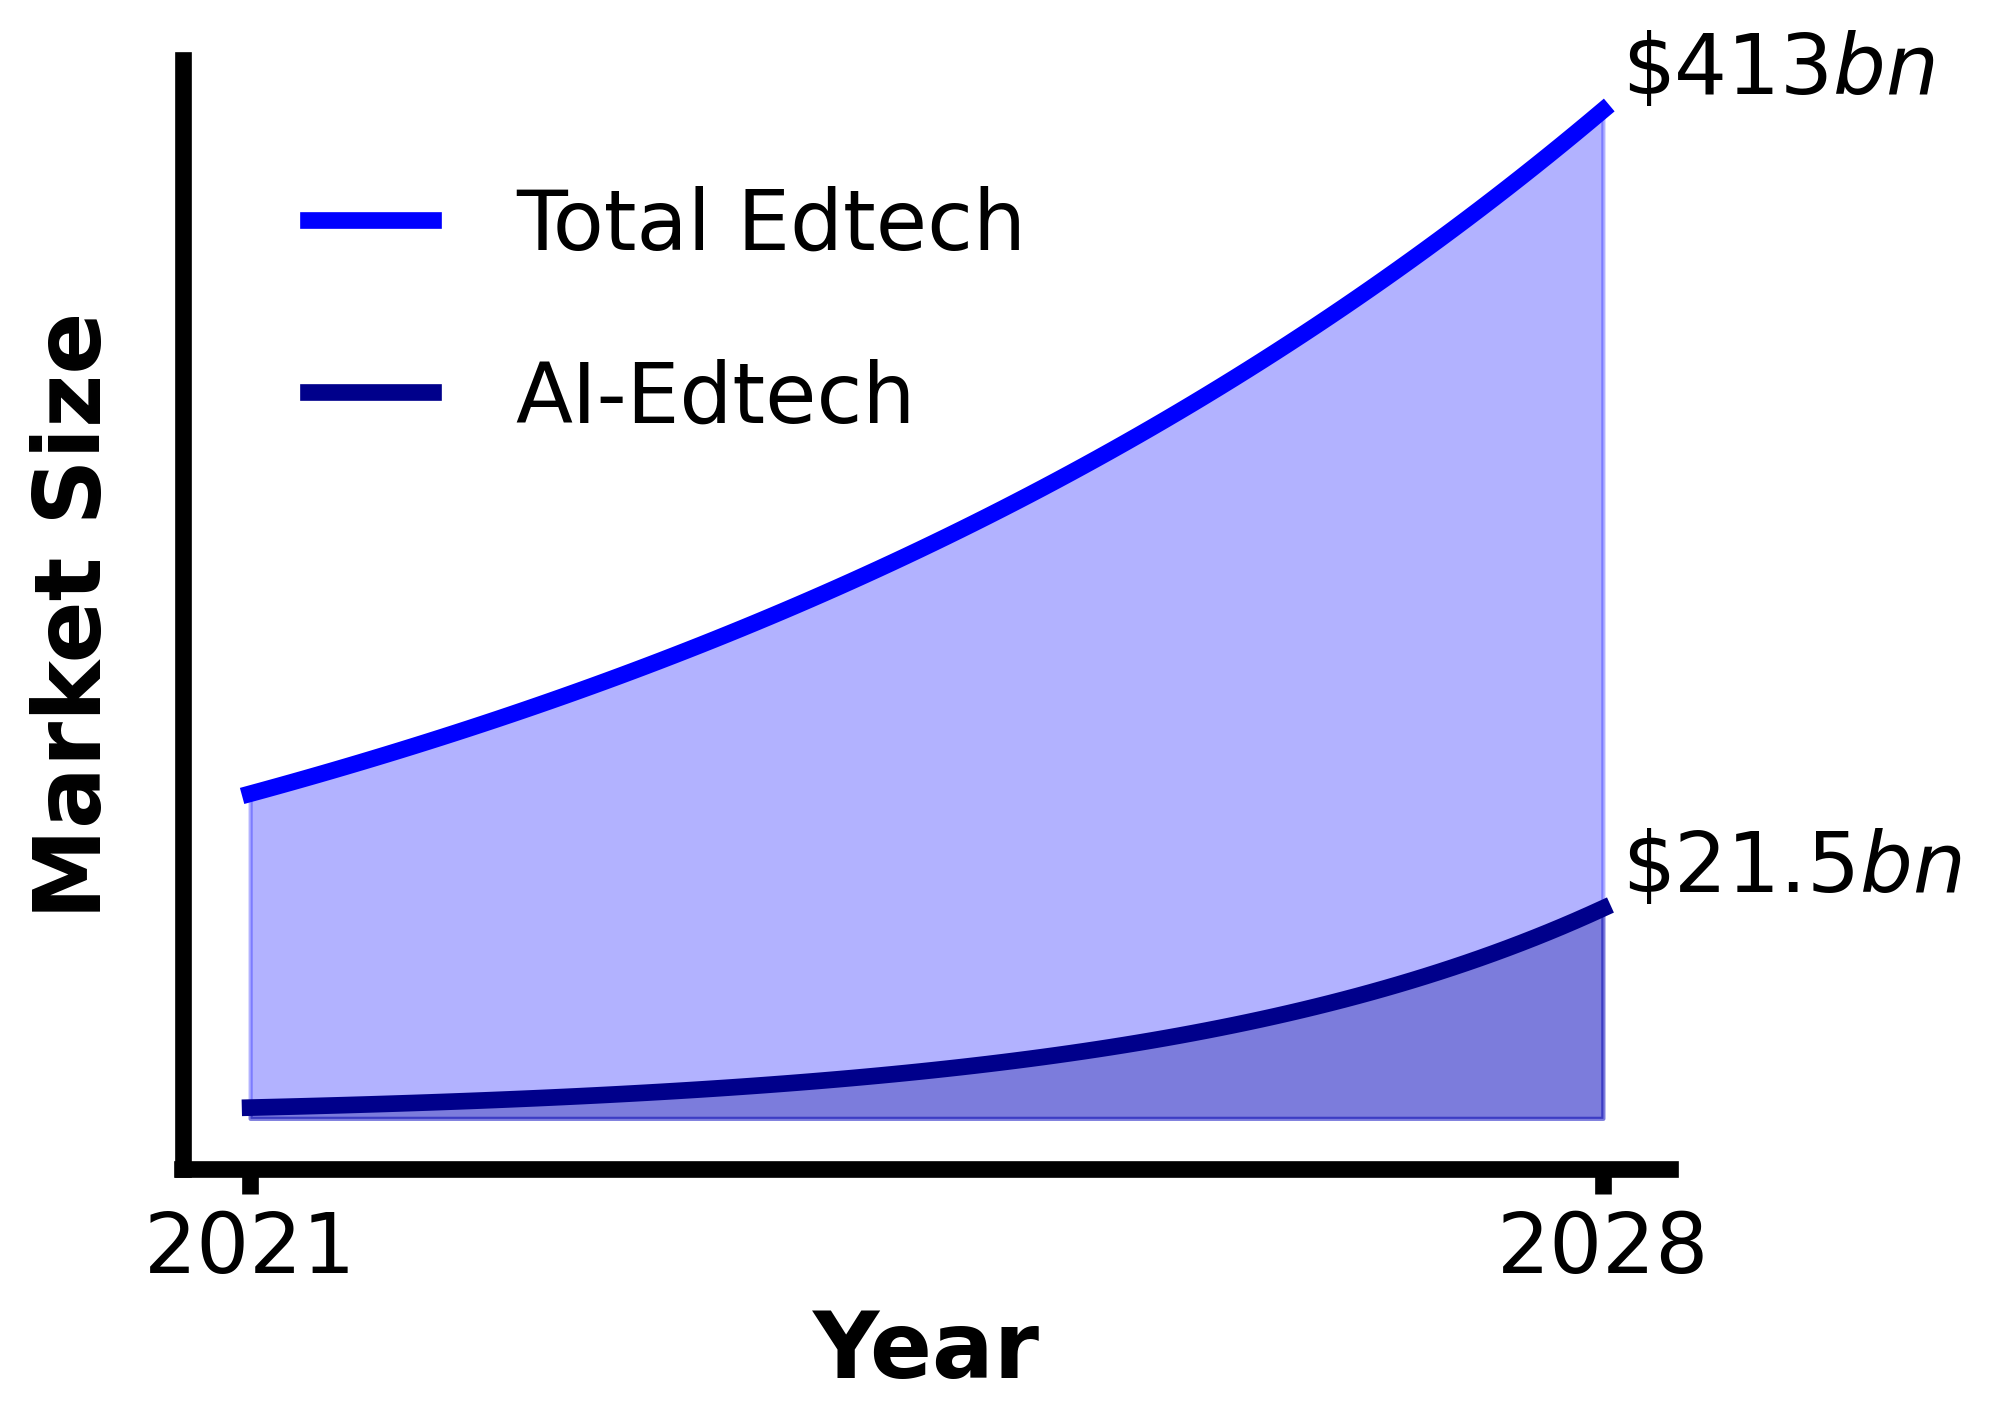

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Given (x, y) data points for two datasets
x_points1 = np.array([2021, 2028])
y_points1 = np.array([133e9, 413e9])

x_points2 = np.array([2021, 2028])
y_points2 = np.array([1.1e9, 21.5e9])

# Create smooth x values
x_smooth = np.linspace(min(x_points1), max(x_points1), 100)

# Address numerical instability by directly computing the exponential growth rate and applying it more cautiously
def stable_exp_growth(x_points, y_points, x_smooth):
    # Calculate the growth rate in log space to avoid overflow
    log_y_points = np.log(y_points)
    slope = (log_y_points[1] - log_y_points[0]) / (x_points[1] - x_points[0])
    intercept = log_y_points[0] - slope * x_points[0]
    
    # Apply the linear equation in log space, then exponentiate safely
    log_y_smooth = slope * x_smooth + intercept
    y_smooth = np.exp(log_y_smooth)
    return y_smooth

# Generate smooth y values for both datasets without causing overflow
y_smooth1 = stable_exp_growth(x_points1, y_points1, x_smooth)
final_y_value1 = y_smooth1[-1]
y_smooth2 = 4*stable_exp_growth(x_points2, y_points2, x_smooth)
final_y_value2 = y_smooth2[-1]

# Adjusting the plot based on new specifications
fig, ax = plt.subplots(dpi=300)

# Plotting with specified colors
ax.plot(x_smooth, y_smooth1, label='Total Edtech', linewidth=4, color='blue')
ax.fill_between(x_smooth, 0, y_smooth1, color='blue', alpha=0.3)
ax.text(x_smooth[-1]+0.1, final_y_value1, f'$\$413bn$', color='black', verticalalignment='bottom', fontsize=20, fontweight='bold')

ax.plot(x_smooth, y_smooth2, label='AI-Edtech', linewidth=4, color='darkblue')
ax.fill_between(x_smooth, 0, y_smooth2, color='darkblue', alpha=0.3)
ax.text(x_smooth[-1]+0.1, final_y_value2, f'$\$21.5bn$', color='black', verticalalignment='bottom', fontsize=20, fontweight='bold')

# Customizing the plot further
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)

# Adjusting x-axis to show only 2021 and 2028
ax.set_xticks([2021, 2028])
ax.set_xticklabels(['2021', '2028'], fontsize=20)
ax.xaxis.set_tick_params(width=4, length=6)

# Removing y-axis labels
ax.set_yticks([])
ax.set_yticklabels([])
ax.yaxis.set_tick_params(width=0)
ax.set_ylabel('Market Size', fontsize=22, fontweight='bold', labelpad=15)

ax.tick_params(axis='both', which='major', labelsize=20, width=4)

plt.xlabel('Year', fontsize=22, fontweight='bold')

leg = plt.legend(fontsize=20, frameon=False, shadow=True, fancybox=True, borderpad=1, handletextpad=1, handlelength=1.5, labelspacing=1.1) #, bbox_to_anchor=(0.5533, 1))
for line in leg.get_lines():
    line.set_linewidth(4)

plt.savefig('plot.png', transparent=True, bbox_inches='tight')

plt.show()
